<a href="https://colab.research.google.com/github/ujjawal-kumar17/student_stress_factor_analysis./blob/main/student_stress_factor_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*********************************************************************************************

* Imports necessary libraries for data analysis and visualization.
* Enables file uploads within a Colab notebook environment.
* Processes uploaded files (specifically CSV files) by printing their
information and loading them into Pandas DataFrames for further analysis.




In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  # Then you can read it in using pandas
  stress = pd.read_csv(fn)

Saving StressLevelDataset.csv to StressLevelDataset (1).csv
User uploaded file "StressLevelDataset (1).csv" with length 48717 bytes


# Descriptive Statistics:
1. How many students are in the dataset?
1. What is the average anxiety level of students in the dataset?
1. How many students have reported a history of mental health issues?
A correlation between stress level and all other variables, positive values would mean higher is worse, negative correlation would mean lower is worse.

***************************************

* Calculates the correlation matrix of the data in the stress DataFrame.
* Selects a specific portion of the correlation matrix to exclude potentially irrelevant information for the heatmap.
* Creates a heatmap visualization using the Seaborn library, displaying the correlations and their values.
* Customizes the heatmap with annotations and a specific color palette for better interpretability

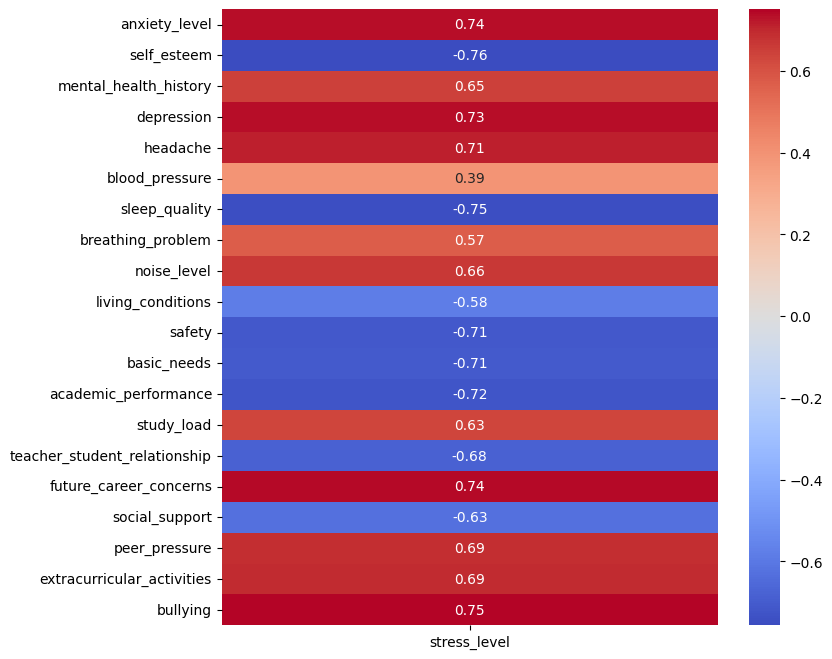

In [3]:
correl = stress.corr()
plt.figure(figsize = (8,8))
sns.heatmap(correl.iloc[:-1,-1:], annot = True, cmap = sns.color_palette("coolwarm", as_cmap=True));

*********

* The total number of students involved.
* The average anxiety level among the students.
* The number of students reporting a history of mental health issues (based on the specific data definition).

In [4]:
print("There are", len(stress), "students in the dataset.")
print("The avarage anxiety level is:", round(stress.anxiety_level.mean(),2))
print(len(stress.loc[stress.mental_health_history == 1]), "students reported a history of mental health issues.")

There are 1100 students in the dataset.
The avarage anxiety level is: 11.06
542 students reported a history of mental health issues.


**Psychological Factors:**

1. How many students have a self-esteem level below the average?
1. What percentage of students have reported experiencing depression?

*************************************************************************************************************************************************************

* Calculate average self-esteem: The code calculates the average self-esteem level in the stress DataFrame.
* Identify students below average self-esteem: The code filters the DataFrame to identify students whose self-esteem is lower than the average self-esteem.
* Count students with moderate or higher depression: The code filters the DataFrame to identify students with depression scores of 10 or higher, which is considered moderate or higher depression according to the data definition.
* Calculate and print percentages: The code calculates the percentage of
students with moderate or higher depression by dividing the count by the total number of students and multiplying by 100.

In [5]:
below_avarage = len(stress.loc[stress["self_esteem"] < stress["self_esteem"].mean()])
print(below_avarage, "students have self esteem below avarage")
depressed = len(stress.loc[stress["depression"] >= 10])
print(round((depressed/len(stress))*100,2), "% of students reported moderate or higher levels of depression.")

507 students have self esteem below avarage
62.36 % of students reported moderate or higher levels of depression.


**Physiological Factors:**

1. How many students experience headaches frequently?
1. What is the average blood pressure reading among the students?
1. How many students rate their sleep quality as poor?
For the headaches assume value more than 3 or more is "frequent". Average blood pressure assume 1 = 90/60, 2 = 110/75, 3 = 130/90,on avarage

************************************************************************

* Analyzes data related to headaches, sleep quality, and blood pressure.
* Creates new columns for systolic and diastolic blood pressure by translating category codes into numerical values.
*  Calculates and displays the average blood pressure

In [6]:
print(len(stress.loc[stress["headache"] >2]), "students experience headaches frequently.")
print(len(stress.loc[stress["sleep_quality"] < 3]), "students have bad sleep quality.")

import pandas as pd

# Define the mapping of category values to blood pressure values
blood_pressure_mapping = {1: (90, 60), 2: (110, 75), 3: (130, 90)}

# Create systolic and diastolic columns using map
stress['systolic'] = stress['blood_pressure'].map(lambda x: blood_pressure_mapping[x][0])
stress['diastolic'] = stress['blood_pressure'].map(lambda x: blood_pressure_mapping[x][1])

# Calculate the mean systolic and diastolic blood pressure
mean_systolic = stress['systolic'].mean()
mean_diastolic = stress['diastolic'].mean()

# Display the result
print("The average blood pressure is: {}/{}".format(round(mean_systolic, 1), round(mean_diastolic, 1)))

556 students experience headaches frequently.
550 students have bad sleep quality.
The average blood pressure is: 113.6/77.7


**Environmental Factors:**

1. How many students live in conditions with high noise levels?
1. What percentage of students feel unsafe in their living conditions?
1. How many students have reported not having their basic needs met?

***************************************************************************************************************************

* It identifies the number of students living in potentially high-noise environments.
* It estimates the percentage of students feeling unsafe in their living conditions based on their reported data.
* It identifies the number of students who reported not having their basic needs met

In [7]:
print(len(stress.loc[stress["noise_level"] >= 4]),"students live in high noise level areas.")
print(round((len(stress.loc[stress["living_conditions"] <= 1])/len(stress))*100,2),"% of students feel unsafe in their living conditions.", sep = "")
print(len(stress.loc[stress["basic_needs"] <= 2]),"students reported, that their basic needs didn't met.")

274 students live in high noise level areas.
18.64% of students feel unsafe in their living conditions.
548 students reported, that their basic needs didn't met.


**Academic Factors:**

1. How many students rate their academic performance as below average?
1. What is the average study load reported by students?
1. How many students have concerns about their future careers?

In [8]:
print(len(stress.loc[stress["academic_performance"] < stress["academic_performance"].mean()]), "students rate their academic performance below avarage.")
print("The avarage study load reported by the students is ", round(stress["study_load"].mean(),2)," on a range of 0-5.", sep = "")
print(len(stress.loc[stress["future_career_concerns"]>= 4]), "students have high concerns about their future careers.")

561 students rate their academic performance below avarage.
The avarage study load reported by the students is 2.62 on a range of 0-5.
371 students have high concerns about their future careers.


**Social Factors:**

1. How many students feel they have strong social support?
1. What percentage of students have experienced bullying?
1. How many students participate in extracurricular activities?

In [9]:
print(len(stress.loc[stress["social_support"]>= 2]), "students feel they have strong social support.")
print(round((len(stress.loc[stress["bullying"] > 0])/len(stress))*100,2),"% of students have experienced bullying.", sep = "")
print(f"{len(stress.loc[stress['extracurricular_activities'] > 0])} students participate in extracurricular activities.")

600 students feel they have strong social support.
96.45% of students have experienced bullying.
1066 students participate in extracurricular activities.


**Comparative Analysis:**

1. Is there a correlation between anxiety level and academic performance?
1. Do students with poor sleep quality also report higher levels of depression?
1. Are students who experience bullying more likely to have a history of mental health issues?

In [10]:
ac_perf = round(stress["anxiety_level"].corr(stress["academic_performance"]),2)
print("The correlation between anxiety level and academic perofmance is ", ac_perf,". This is a moderate negative correlation, based on this the people who think they perform better also experience less anxiety.", sep = "" )
sleep_dep = round(stress["sleep_quality"].corr(stress["depression"]),2)
print("The correlation between depression and sleep quality is ", sleep_dep,". This is a moderate/strong negative correlation, people who sleep better less likely to report higher levels of depression.", sep = "")
bull_mental = round(stress["bullying"].corr(stress["mental_health_history"]), 2)
print("The correlation between bullying and history of mental illness is ",bull_mental,". This is a moderate positive correlation, people who are the victims of bullying also more likely to have history of mental illness.", sep = "")

The correlation between anxiety level and academic perofmance is -0.65. This is a moderate negative correlation, based on this the people who think they perform better also experience less anxiety.
The correlation between depression and sleep quality is -0.69. This is a moderate/strong negative correlation, people who sleep better less likely to report higher levels of depression.
The correlation between bullying and history of mental illness is 0.62. This is a moderate positive correlation, people who are the victims of bullying also more likely to have history of mental illness.


**General Exploration:**

1. Which factor (Psychological, Physiological, Environmental, Academic, Social) has the highest number of students reporting negative experiences or conditions?
1. Are there any noticeable trends or patterns when comparing different factors?
1. Which specific feature within each factor has the most significant impact on student stress, based on the dataset?

In [11]:
#Separate the mental factor columns
mental_pos = stress[["anxiety_level", "depression", "self_esteem", "mental_health_history"]]
#Create a dictionary
mental_pos_count = {}
#Iterate over the pyschological factor columns
for column,row in mental_pos.items():
    #If it is anxiety or depression we count the people who are in the upper 40%
    if column == "anxiety_level" or column == "depression":
        count = (row > np.percentile(mental_pos[column],60))
        #Add the resulting dataset to the dictionary under the column's name
        mental_pos_count[column] = count
    #Everyone who had history with mental diseases get counted
    elif column == "mental_health_history":
        count = row == 1
        #Add the resulting dataset to the dictionary under the column's name
        mental_pos_count[column] = count
    #People who are in the lower 40% get counted for self-esteem
    else:
        count = (row < np.percentile(mental_pos[column],40))
        #Add the resulting dataset to the dictionary under the column's name
        mental_pos_count[column] = count
#Create a pandas dataframe
mental_pos_df = pd.DataFrame(mental_pos_count)
#Count every row where atleast one value is true
mental_number = len((mental_pos_df[(mental_pos_df >= 1).sum(axis=1) >= 1]))

In [12]:
#Separate the physical factor columns
physical = stress[["headache", "blood_pressure", "sleep_quality", "breathing_problem"]]
#Create a dictionary
physical_dict = {}
#Iterate over the physical factor columns
for column,row in physical.items():
    #People in the upper 40% for headache, breathing problems or blood pressure get counted
    if column == "headache" or column == "breathing problem" or column == "blood_pressure":
        count = (row > np.percentile(physical[column],60))
        #Add the resulting dataset to the dictionary under the column's name
        physical_dict[column] = count
    #People in the lower 40% for sleep quality get counted
    else:
        count = (row < np.percentile(physical[column],40))
        #Add the resulting dataset to the dictionary under the column's name
        physical_dict[column] = count
#Create a pandas dataframe
physical_df = pd.DataFrame(physical_dict)
#Count every row where atleast one value is true
physical_number = len((physical_df[(physical_df >= 1).sum(axis=1) >= 1]))

In [13]:
#Separate the environmental factor columns
env = stress[["living_conditions", "safety", "basic_needs", "noise_level"]]
#Create a dictionary
env_dict = {}
#Iterate over the environmental factor columns
for column,row in env.items():
    #People in the upper 40% for noise level get counted
    if column == "noise_level":
        count = (row > np.percentile(env[column],60))
        #Add the resulting dataset to the dictionary under the column's name
        env_dict[column] = count
    #People in the lower 40% for sleep quality get counted
    else:
        count = (row < np.percentile(env[column],40))
        #Add the resulting dataset to the dictionary under the column's name
        env_dict[column] = count
#Create a pandas dataframe
env_df = pd.DataFrame(env_dict)
#Count every row where atleast one value is true
env_number = len((env_df[(env_df >= 1).sum(axis=1) >= 1]))

In [14]:
#Separate the academic factor columns
acad = stress[["academic_performance", "study_load", "teacher_student_relationship", "future_career_concerns"]]
#Create a dictionary
acad_dict = {}
#Iterate over the academic factor columns
for column,row in acad.items():
    #People in the upper 40% for study load and future career concners get counted
    if column == "study_load" or column == "future_career_concerns":
        count = (row > np.percentile(acad[column],60))
        #Add the resulting dataset to the dictionary under the column's name
        acad_dict[column] = count
    #People in the lower 40% for academic performance or teacher student relationship get counted
    else:
        count = (row < np.percentile(acad[column],40))
        #Add the resulting dataset to the dictionary under the column's name
        acad_dict[column] = count
#Create a pandas dataframe
acad_df = pd.DataFrame(acad_dict)
#Count every row where atleast one value is true
acad_number = len((acad_df[(acad_df >= 1).sum(axis=1) >= 1]))

In [15]:
#Separate the social factor columns
social = stress.iloc[:, 16:20]
#Create a dictionary
social_dict = {}
#Iterate over the academic factor columns
for column,row in social.items():
    #People in the upper 40% for peer pressure, extracurricular activities and bullying get counted
    if column == "peer_pressure" or column == "extracurricular_activities" or column == "bullying":
        count = (row > np.percentile(social[column],60))
        #Add the resulting dataset to the dictionary under the column's name
        social_dict[column] = count
    #People in the lower 40% for social support get counted
    else:
        count = (row < np.percentile(social[column],40))
        #Add the resulting dataset to the dictionary under the column's name
        social_dict[column] = count
#Create a pandas dataframe
social_df = pd.DataFrame(social_dict)
#Count every row where atleast one value is true
social_number = len((social_df[(social_df >= 1).sum(axis=1) >= 1]))

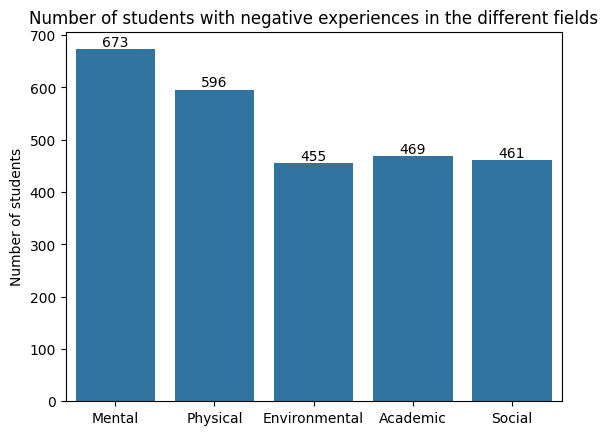

In [16]:
#Create a pandas series from the numbers
neg = pd.Series([mental_number, physical_number, env_number, acad_number, social_number])
#Choose column names
col_names = ["Mental", "Physical", "Environmental", "Academic", "Social"]
#Create the barplot
ax = sns.barplot(x = col_names, y = neg.values)
#Name the plot
ax.set(title="Number of students with negative experiences in the different fields")
#Show the number on top of the bar
ax.bar_label(ax.containers[0])
#Set the y label
ax.set_ylabel("Number of students");

In [17]:
#Choose which factor has the biggest impact on stress level within each variable subgroup.
print("In mental variables", round(correl.iloc[-1:,0:4].abs().max(),2).index.max().replace("_", " "), "has the biggest impact.")
print("In physical variables", round(correl.iloc[-1:,4:8].abs().max(),2).index.max().replace("_", " "), "has the biggest impact.")
print("In environmental variables", round(correl.iloc[-1:,8:12].abs().max(),2).index.max()), "has the biggest impact."
print("In academic variables", round(correl.iloc[-1:,12:16].abs().max(),2).index.max().replace("_", " "), "has the biggest impact.")
print("In social variables", round(correl.iloc[-1:,16:20].abs().max(),2).index.max().replace("_", " "), "has the biggest impact.")

In mental variables self esteem has the biggest impact.
In physical variables sleep quality has the biggest impact.
In environmental variables safety
In academic variables teacher student relationship has the biggest impact.
In social variables social support has the biggest impact.


**no null values**

In [18]:
stress.isnull().sum()


anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
systolic                        0
diastolic                       0
dtype: int64

# Data Visualization



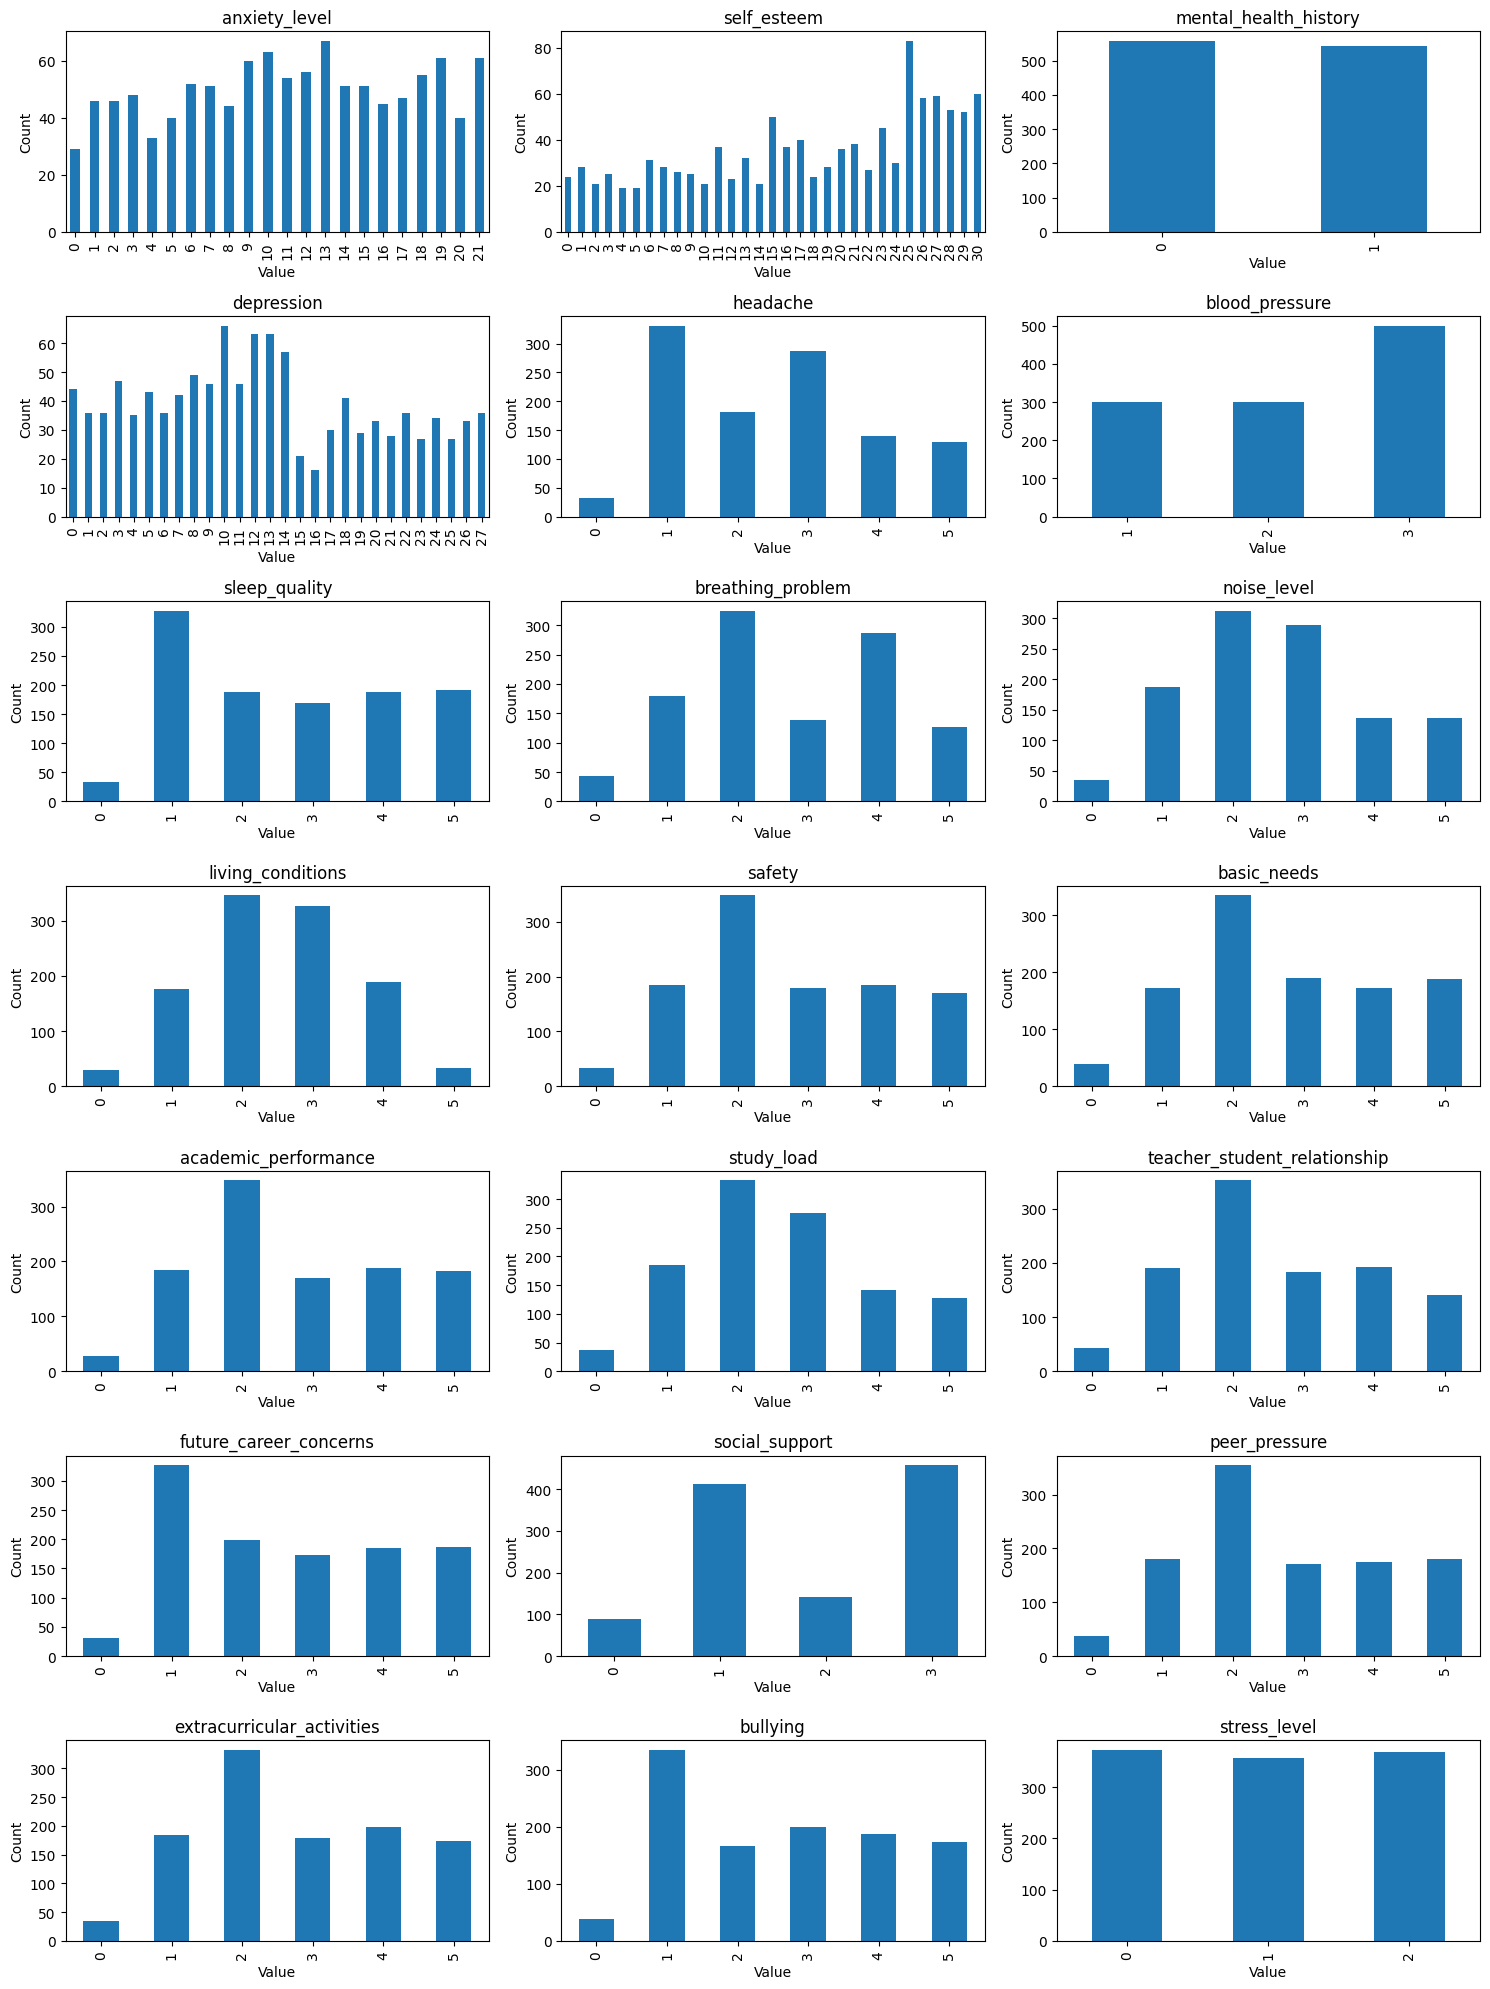

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Selecting features
selected_features = stress.columns[:-1]  # Exclude the 'stress_level'

# Setting up subplots
fig, axes = plt.subplots(7, 3, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

# Plotting bar charts for each feature
for i, feature in enumerate(selected_features):
    if i < 21:  # Limit the number of subplots to the available space
        row, col = divmod(i, 3)
        ax = axes[row, col]
        stress[feature].value_counts().sort_index().plot(kind='bar', ax=ax)
        ax.set_title(feature)
        ax.set_xlabel('Value')
        ax.set_ylabel('Count')

plt.tight_layout()

# Display the plots
plt.show()

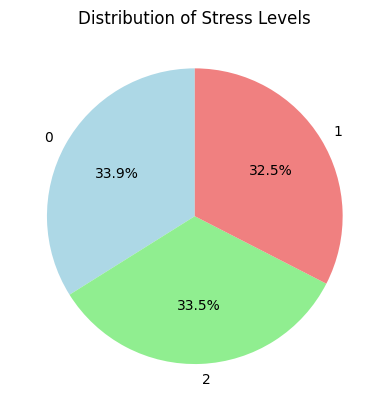

In [20]:
import matplotlib.pyplot as plt

stress['stress_level'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Stress Levels')
plt.ylabel('')
plt.show()

# Basic Data Analysis:
Calculate basic statistics for your data. This includes mean, variance, skewness, and kurtosis.

* Skewness measures the asymmetry of the data distribution. Negative skewness (e.g., anxiety_level, self_esteem) indicates a left-skewed distribution.
* Kurtosis measures the tailedness of the data distribution. Negative kurtosis suggests a distribution with lighter tails than a normal distribution.

In [21]:
selected_features = stress.columns[:-1]  # Exclude the 'stress_level' column

statistics = stress[selected_features].describe().transpose()

# Adding skewness and kurtosis to the statistics
statistics['skewness'] = stress[selected_features].skew()
statistics['kurtosis'] = stress[selected_features].kurt()
print(statistics)

                               count        mean        std   min   25%  \
anxiety_level                 1100.0   11.063636   6.117558   0.0   6.0   
self_esteem                   1100.0   17.777273   8.944599   0.0  11.0   
mental_health_history         1100.0    0.492727   0.500175   0.0   0.0   
depression                    1100.0   12.555455   7.727008   0.0   6.0   
headache                      1100.0    2.508182   1.409356   0.0   1.0   
blood_pressure                1100.0    2.181818   0.833575   1.0   1.0   
sleep_quality                 1100.0    2.660000   1.548383   0.0   1.0   
breathing_problem             1100.0    2.753636   1.400713   0.0   2.0   
noise_level                   1100.0    2.649091   1.328127   0.0   2.0   
living_conditions             1100.0    2.518182   1.119208   0.0   2.0   
safety                        1100.0    2.737273   1.406171   0.0   2.0   
basic_needs                   1100.0    2.772727   1.433761   0.0   2.0   
academic_performance     

**insights:**

Features with Potential Impact on Stress:

Features like anxiety_level, self_esteem, depression, sleep_quality,and extracurricular_activities exhibit variation across their different percentiles.

For instance, higher values in anxiety_level, depression, and lower values in self_esteem might be associated with higher stress levels.

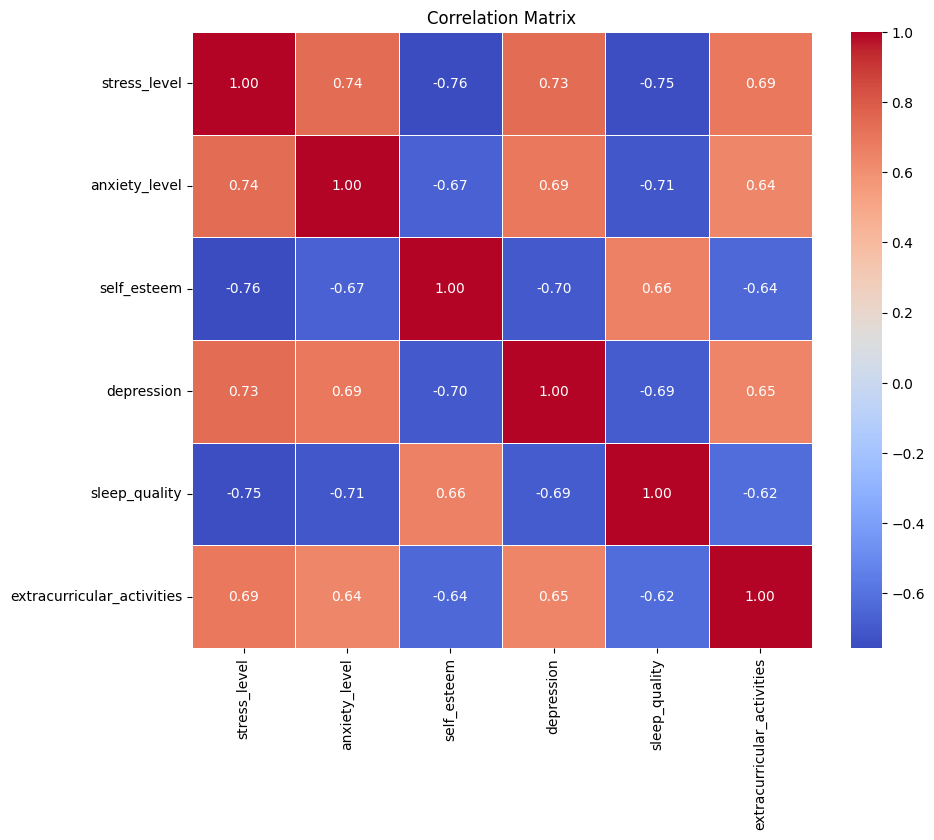

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = stress[['stress_level', 'anxiety_level', 'self_esteem', 'depression', 'sleep_quality', 'extracurricular_activities']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

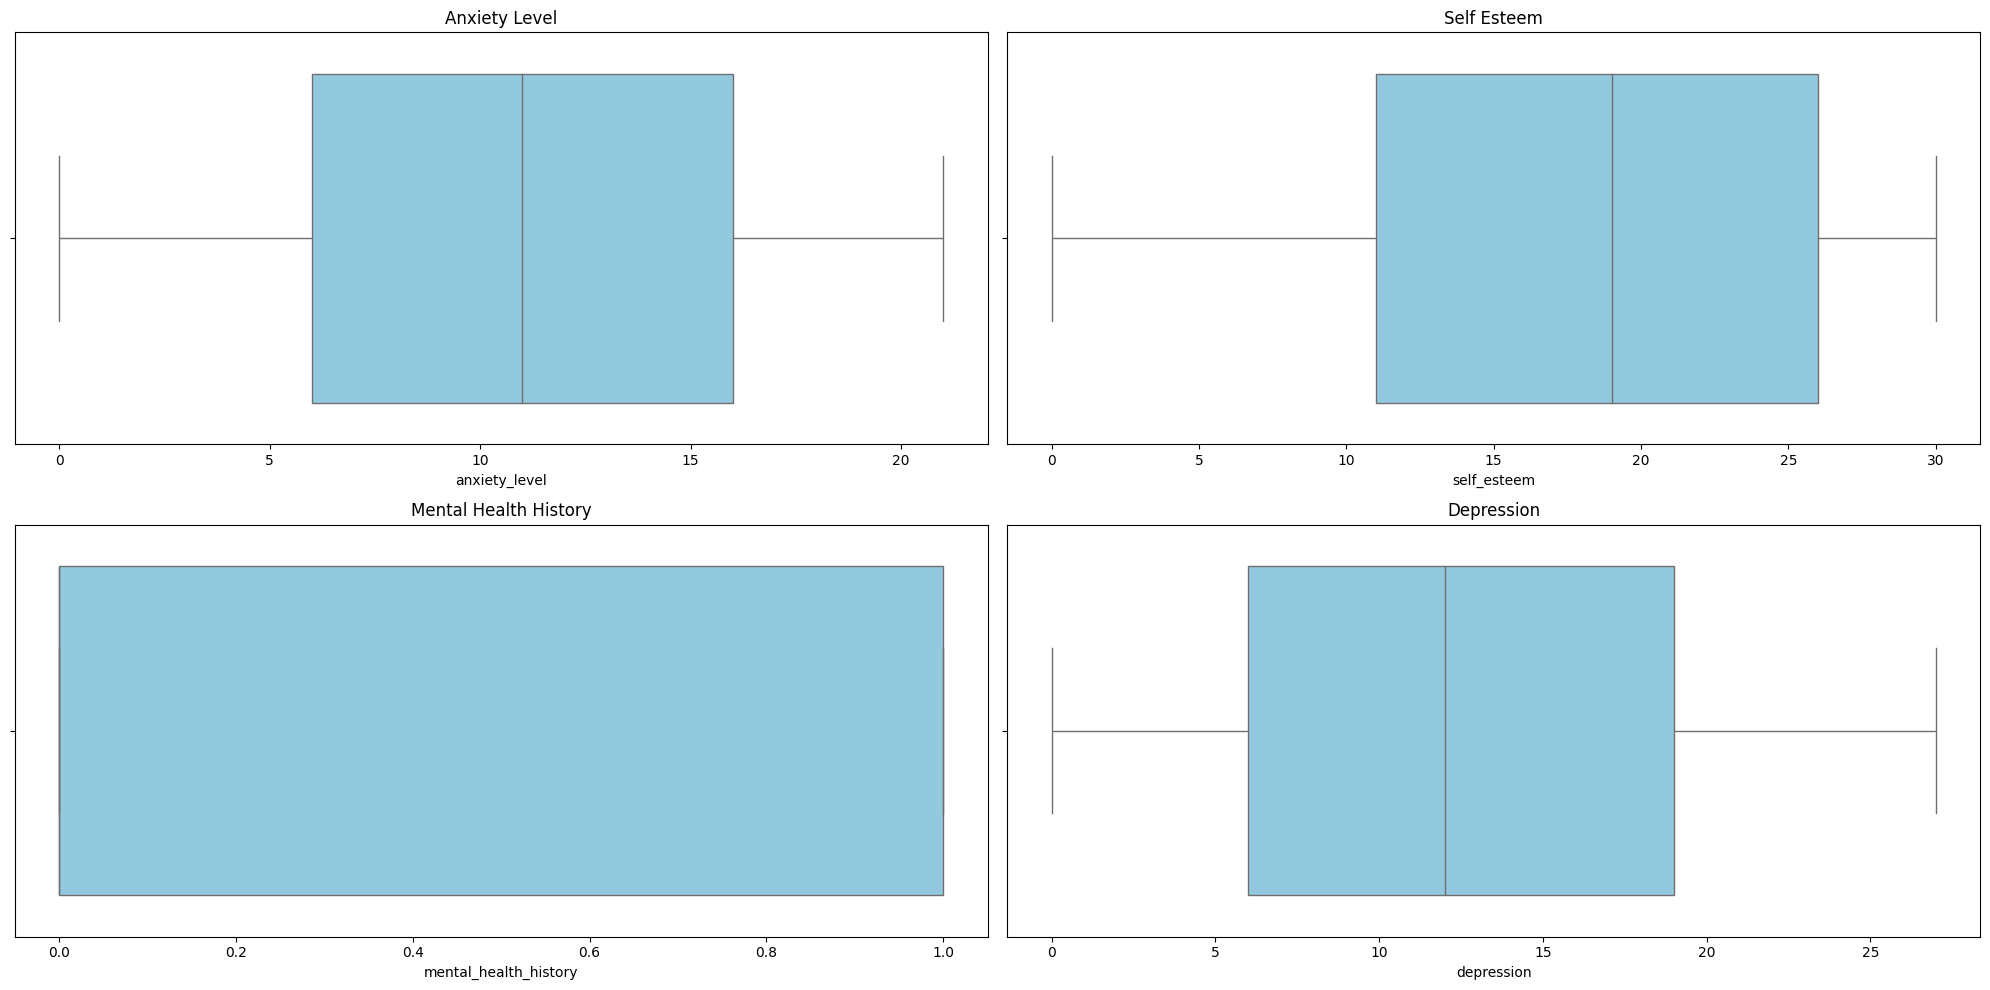

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to create box plots for
features = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Loop through features and create box plots
for i, feature in enumerate(features):
    row, col = divmod(i, 2)  # divmod returns quotient and remainder
    sns.boxplot(x=stress[feature], ax=axes[row, col], color='skyblue')
    axes[row, col].set_title(feature.replace('_', ' ').title())

plt.tight_layout()
plt.show()

# chi^2

In [24]:
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import chi2_contingency

# Create categorical variables from numerical data
k_bins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
categorical_data = pd.DataFrame(k_bins.fit_transform(stress), columns=stress.columns)

# Perform a chi-square test
chi2_results = {}
for column in categorical_data.columns:
    contingency_table = pd.crosstab(categorical_data[column], stress['stress_level'])
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_results[column] = {'Chi2 Statistic': chi2_stat, 'p-value': p_value}

chi2_results_stress = pd.DataFrame(chi2_results).T

print("\nchi2_results:")
print(chi2_results_stress)


chi2_results:
                              Chi2 Statistic        p-value
anxiety_level                     958.631229  3.291548e-206
self_esteem                       621.609156  3.259637e-133
mental_health_history             462.873402  3.078349e-101
depression                       1218.755370  1.368462e-262
headache                         1111.125336  2.935709e-239
blood_pressure                   1570.409933   0.000000e+00
sleep_quality                    1467.136351   0.000000e+00
breathing_problem                 338.168640   6.284591e-72
noise_level                       700.379434  2.884563e-150
living_conditions                 491.607050  4.377608e-105
safety                            966.315366  7.116576e-208
basic_needs                       958.953151  2.803117e-206
academic_performance              997.281680  1.385775e-214
study_load                        630.727002  3.463841e-135
teacher_student_relationship      959.546721  2.084574e-206
future_career_concerns   

# covariance matrix:

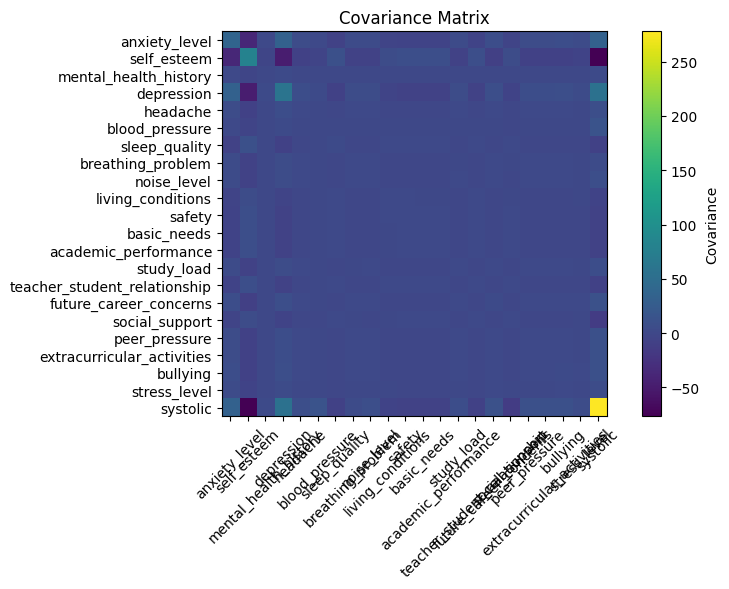

In [25]:
selected_features = stress.columns[:-1]  # Exclude the 'stress_level' column

# Covariance matrix
cov_matrix = stress[selected_features].cov()

plt.figure(figsize=(9, 5))
plt.imshow(cov_matrix, cmap='viridis', interpolation='none')
plt.colorbar(label='Covariance')
plt.xticks(range(len(selected_features)), selected_features, rotation=45)
plt.yticks(range(len(selected_features)), selected_features)
plt.title('Covariance Matrix')
plt.show()

# ANOVA:


In [26]:
import pandas as pd
from scipy.stats import f_oneway
# ANOVA
categorical_variable = 'academic_performance'

anova_results = {}
for continuous_variable in selected_features:
    if continuous_variable != categorical_variable:
        group_data = [stress[stress[categorical_variable] == group][continuous_variable] for group in stress[categorical_variable].unique()]
        f_stat, p_value = f_oneway(*group_data)
        anova_results[continuous_variable] = {'F-statistic': f_stat, 'p-value': p_value}

anova_stress = pd.DataFrame(anova_results).T

# Displaying ANOVA results
print("\nANOVA results:")
print(anova_stress)


ANOVA results:
                              F-statistic        p-value
anxiety_level                  231.483915  1.262729e-168
self_esteem                    186.193271  1.629049e-143
mental_health_history          154.920530  1.720088e-124
depression                     184.141406  2.598201e-142
headache                       176.457085  9.411326e-138
blood_pressure                 120.561306  1.112751e-101
sleep_quality                  238.328308  3.362498e-172
breathing_problem              121.250888  3.685945e-102
noise_level                    108.074703   8.045542e-93
living_conditions               96.435674   2.939484e-84
safety                         195.599242  5.953863e-149
basic_needs                    204.061169  9.708054e-154
study_load                     119.056149  1.250597e-100
teacher_student_relationship   212.779679  1.421934e-158
future_career_concerns         214.212839  2.330891e-159
social_support                 118.895664  1.619649e-100
peer_pressure  

**insights:**

**Highly Significant Differences:**

Variables such as **'stress_level', 'anxiety_level', 'sleep_quality', 'bullying'** have extremely low p-values (close to zero), indicating highly significant differences in their means across different levels of 'academic_performance'. These variables are likely to be strongly associated with academic performance.

**Significant Differences:**

Other variables like **'safety', 'basic_needs', 'teacher_student_relationship', 'future_career_concerns'** also have very low p-values, indicating significant differences. These variables may also play a substantial role in the variation of academic performance.

**Moderate to Low Significance:**

Variables like **'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure', 'breathing_problem', 'noise_level', 'living_conditions', 'study_load', 'social_support', 'peer_pressure', 'extracurricular_activities'** have moderate to low p-values. While statistically significant, the association with 'academic_performance' may not be as strong as the highly significant variables.

# Z_test:



In [27]:
from scipy.stats import zscore, norm
import scipy.stats as stats
import numpy as np

# Specify the variable for which you want to perform the Z-test
Target = 'anxiety_level'

# Extract the data for the specific category of 'academic_performance'
category_data = stress[stress['academic_performance'] == 1][Target]

# Calculate the Z-scores
z_scores = zscore(category_data)

# Define the significance level (e.g., 0.05)
alpha = 0.05

# Calculate the critical Z-value for a two-tailed test
critical_z = norm.ppf(1 - alpha / 2)

# Calculate the test statistic
test_statistic = z_scores.mean()

# Compare the test statistic to the critical Z-value
if np.abs(test_statistic) > critical_z:
    print(f"The Z-test result is statistically significant for {Target} in academic performance.")
else:
    print(f"The Z-test result is not statistically significant for {Target} in academic performance.")

# Calculate the p-values for each Z-score
p_values = 2 * (1 - stats.norm.cdf(np.abs(z_scores)))
# Hypothesis testing for each p-value
if any(p_values < alpha):
    print("Reject Null Hypothesis for at least one observation.")
else:
    print("Fail to Reject Null Hypothesis for all observations.")

The Z-test result is not statistically significant for anxiety_level in academic performance.
Reject Null Hypothesis for at least one observation.


# Linear Discriminant Analysis
LDA involves projecting the data onto axes; however, its goal is to choose axes that maximize class separability and minimize intra-class scatter simultaneously. With a binary-class dataset, the data will be projected onto a line. With a n-class dataset, the data will be projected onto an (n-1)-dimensional-space.

In [28]:
import plotly.express as pex
import warnings
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
import pandas as pd

# Suppressing the FutureWarning
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)


    model = lda(n_components=1)
    newData = model.fit_transform(stress.drop('stress_level', axis=1), stress['stress_level'])

# Creating a DataFrame with meaningful column names
newData = pd.DataFrame({'LD1': newData[:, 0], 'stress_level': stress['stress_level'], 'y': 0})
model.explained_variance_ratio_

array([0.51558512])

In [29]:
fig = pex.scatter(newData, x='LD1', y='y', color='stress_level',
                  color_continuous_scale=pex.colors.sequential.Viridis,title='LDA - Scatter Plot')
fig.show()

significant overlabing indicates that LDA might not be as effective in distinguishing between those stress levels(2 & 0).


# PCA:

In [30]:
cov_matrix = np.cov(stress.drop('stress_level',axis=1), rowvar=False)
cov_matrix.shape
(30, 30)
values, vectors = np.linalg.eig(cov_matrix)
print("Values shape: " + str(values.shape))
print("Vectors shape: " + str(vectors.shape))

Values shape: (22,)
Vectors shape: (22, 22)


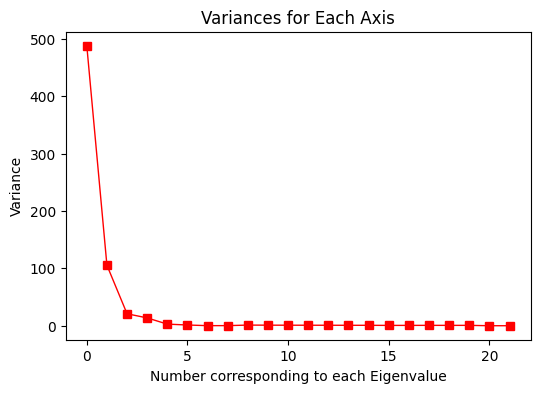

In [31]:
plt.figure(figsize=(6,4),dpi=100)
plt.plot(values,marker='s',color='red',lw=1)
plt.xlabel('Number corresponding to each Eigenvalue')
plt.ylabel('Variance')
plt.title('Variances for Each Axis')
plt.show()

In [32]:
#Take the top 3 eigenvectors and project data onto them.
top_3_vectors = vectors[:,np.array([0,1,2])]
# Project data down to 3 axes by computing dot product
principal_comp = np.dot(stress.drop('stress_level',axis=1).values, top_3_vectors)
print(principal_comp.shape) #Correct shape

(1100, 3)


In [33]:
pex.scatter_3d(x=principal_comp[:,0],y=principal_comp[:,1],z=principal_comp[:,2],color=stress.stress_level, color_continuous_scale=pex.colors.sequential.Viridis)

# SVD Singular Value Decomposition

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

scaler = StandardScaler()
stress_standardized = scaler.fit_transform(stress)
#stress_normalized = scaler.fit_transform(X)
U, S, Vt = np.linalg.svd(stress, full_matrices=False)
# Calculate the explained variance
explained_variance = np.cumsum(S**2) / np.sum(S**2)

# Choose the number of components to retain
n_components = np.argmax(explained_variance > 0.95) + 1
U_reduced = U[:, :n_components]
S_reduced = np.diag(S[:n_components])
Vt_reduced = Vt[:n_components, :]


In [35]:
stress_reduced = np.dot(U_reduced, np.dot(S_reduced, Vt_reduced))
svd = TruncatedSVD(n_components=2)
stress_reduced_sklearn = svd.fit_transform(stress)

In [36]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Assuming explained_variance is calculated as in the previous example

# Create a scree plot
trace1 = go.Scatter(
    x=list(range(1, len(explained_variance) + 1)),
    y=explained_variance,
    mode='lines+markers',
    name='Explained Variance',
)

layout = go.Layout(
    title='Scree Plot of Explained Variance',
    xaxis=dict(title='Principal Component'),
    yaxis=dict(title='Explained Variance'),
)

fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter'}]])
fig.add_trace(trace1)
fig.update_layout(layout)
fig.show()


"elbow" point in the plot. This is the point where adding more principal components doesn't significantly increase the explained variance. The elbow point is a good indicator of the optimal number of components to retain.

So, we used 2 n_componants because the 'elbow point' is at 2

# Models Implementation, Evaluation, Results & Confusion Matrices

In [37]:
!pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.5 MB/s eta 0:00:00


In [38]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from pgmpy.estimators import ParameterEstimator, MaximumLikelihoodEstimator
from pgmpy.models import BayesianModel
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Data Splitting
X = stress.drop(["stress_level"], axis=1)
y = stress.stress_level
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scaling with StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

# Naive Bayes:



In [39]:
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8909090909090909


# BBN:

In [40]:
"""class StressClassifier(object):
    def __init__(self, data):
        clusters = []

        for (i, row) in data.iterrows():
            best = -1
            sim = 0.5

            for (j, cluster) in enumerate(clusters):
                x = sum(cluster[key][value] / sum(cluster[key].values())
                        for (key, value) in row.items()) / (data.shape[1])

                if x > sim:
                    best = j
                    sim = x

            if best == -1:
                clusters.append(collections.defaultdict(lambda: collections.defaultdict(float)))
                print(i + 1, 'rows analysed', len(clusters), 'clusters found')

            for (key, value) in row.items():
                clusters[best][key][value] += 1.0

        index = [(column, value) for column in data.columns if column != 'stress_level' for value in data[column].unique()]

        self.probabilities = pd.DataFrame({(key, value): [cluster[key][value] + 1.0 for cluster in clusters] for (key, value) in index}).T

        self.prior = self.probabilities.sum(axis=0)
        self.prior /= self.prior.sum()

        self.stress_level_prior = self.probabilities.loc['stress_level'].sum(axis=1)
        self.stress_level_prior /= self.stress_level_prior.sum()

        def normalize(group):
            return group.div(group.sum(axis=0), axis='columns')

        self.probabilities = self.probabilities.groupby(axis=0, level=0).apply(normalize)

    def __call__(self, **kwargs):
        category = self.prior.copy()

        for (key, value) in kwargs.items():
            category *= self.probabilities.loc[(key, value)]
            category /= category.sum()

        result = self.stress_level_prior * ((self.probabilities.loc['stress_level'] * category).sum(axis=1))
        return result / result.sum()

    def test(self, data):
        observables = [column for column in data.columns if column != 'stress_level']
        results = pd.DataFrame([self(**row) for (i, row) in data[observables].iterrows()])
        results.loc[:, 'stress_level'] = data['stress_level']
        return results

# Replace 'stress' with the actual name of your dataframe
BBN_stress = StressClassifier('/kaggle/input/student-stress-factors-a-comprehensive-analysis')

# Test the classifier and check the KDE plots
result_stress = BBN_stress.test(stress)

# Reset the index before plotting
result_stress.reset_index(drop=True, inplace=True)

result_stress['stress_level'].plot.kde()
plt.show()
"""

"class StressClassifier(object):\n    def __init__(self, data):\n        clusters = []\n\n        for (i, row) in data.iterrows():\n            best = -1\n            sim = 0.5\n\n            for (j, cluster) in enumerate(clusters):\n                x = sum(cluster[key][value] / sum(cluster[key].values())\n                        for (key, value) in row.items()) / (data.shape[1])\n\n                if x > sim:\n                    best = j\n                    sim = x\n\n            if best == -1:\n                clusters.append(collections.defaultdict(lambda: collections.defaultdict(float)))\n                print(i + 1, 'rows analysed', len(clusters), 'clusters found')\n\n            for (key, value) in row.items():\n                clusters[best][key][value] += 1.0\n\n        index = [(column, value) for column in data.columns if column != 'stress_level' for value in data[column].unique()]\n\n        self.probabilities = pd.DataFrame({(key, value): [cluster[key][value] + 1.0 for cl

# DTREE:

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

In [42]:
# Step 1: Create a Decision Tree model
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Step 2: Train the model on the training set
dt_model.fit(X_train, y_train)

# Step 3: Make predictions on the testing set
y_pred = dt_model.predict(X_test)

# Step 4: Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.8909090909090909
Confusion Matrix:
[[85  5  5]
 [ 6 83  3]
 [ 7  4 77]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        95
           1       0.90      0.90      0.90        92
           2       0.91      0.88      0.89        88

    accuracy                           0.89       275
   macro avg       0.89      0.89      0.89       275
weighted avg       0.89      0.89      0.89       275



**DTree ROC**

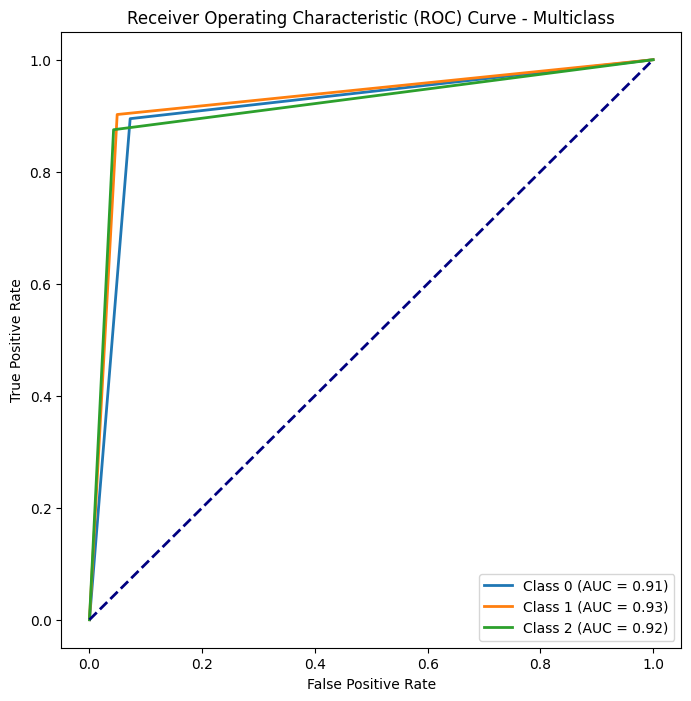

In [43]:
# Binarize the labels for each class
y_test_bin = label_binarize(y_test, classes=dt_model.classes_)

y_pred_prob = dt_model.predict_proba(X_test)

# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(dt_model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 8))
for i in range(len(dt_model.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multiclass')
plt.legend(loc='lower right')
plt.show()

# LDA Classifier



In [44]:
lda_model = LinearDiscriminantAnalysis()

# Step 3: Train the model on the training set
lda_model.fit(X_train, y_train)

# Step 4: Make predictions on the testing set
y_pred = lda_model.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Step 6: Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8981818181818182
Confusion Matrix:
[[84  4  7]
 [ 5 81  6]
 [ 4  2 82]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        95
           1       0.93      0.88      0.91        92
           2       0.86      0.93      0.90        88

    accuracy                           0.90       275
   macro avg       0.90      0.90      0.90       275
weighted avg       0.90      0.90      0.90       275



# PCA Classifier



In [45]:
n_components = 3
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Step 4: Train a classifier (Random Forest in this example) on the PCA-transformed data
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_pca, y_train)

# Step 5: Make predictions on the testing set
y_pred = classifier.predict(X_test_pca)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Step 7: Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8981818181818182
Confusion Matrix:
[[84  4  7]
 [ 3 81  8]
 [ 5  1 82]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90        95
           1       0.94      0.88      0.91        92
           2       0.85      0.93      0.89        88

    accuracy                           0.90       275
   macro avg       0.90      0.90      0.90       275
weighted avg       0.90      0.90      0.90       275



# KNN:

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits


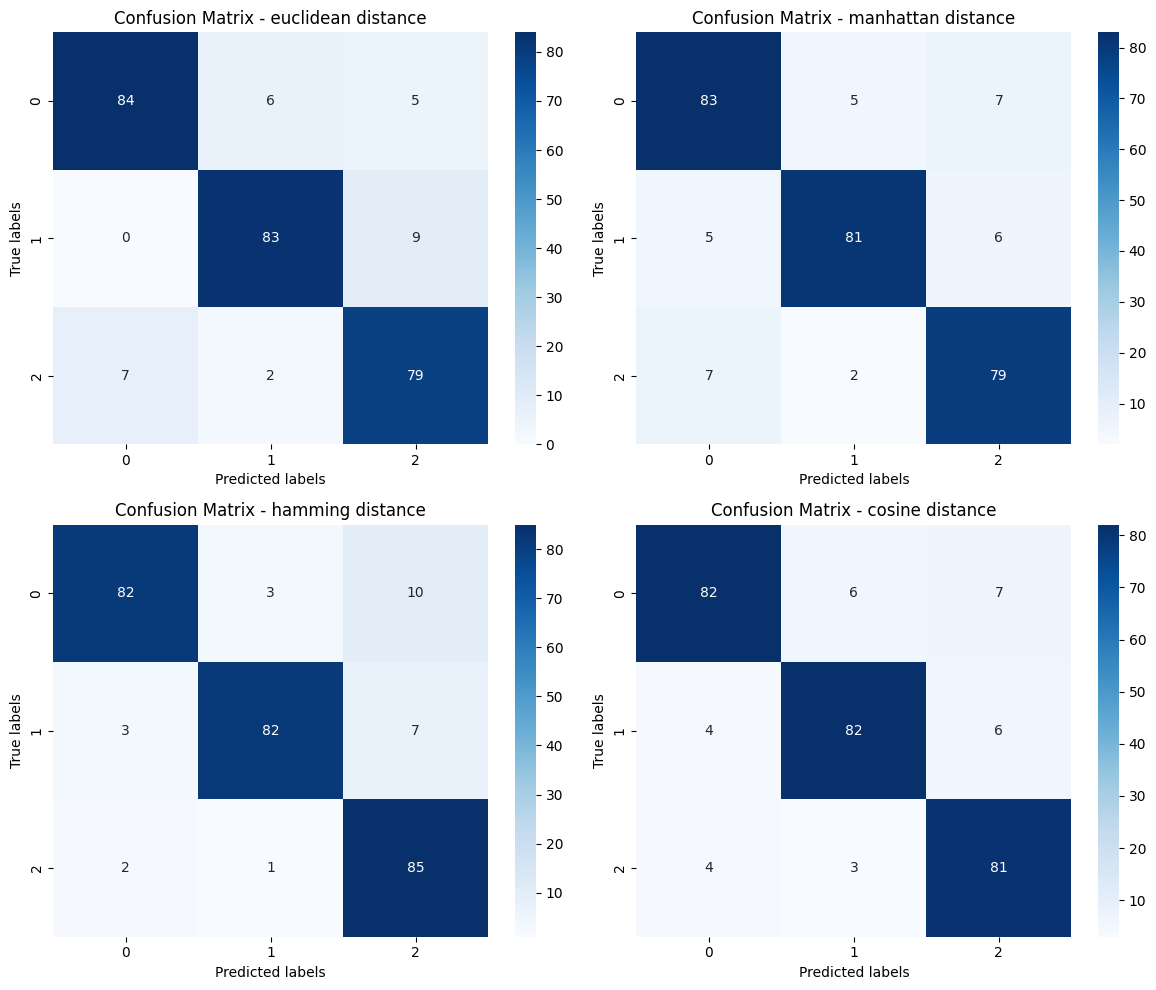

In [46]:
from sklearn.model_selection import GridSearchCV

# List of distance metrics
distance_metrics = ['euclidean', 'manhattan', 'hamming', 'cosine']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, metric in enumerate(distance_metrics):
    # K-Nearest Neighbors (KNN) with GridSearchCV for each distance metric
    param_grid_knn = {'n_neighbors': [1, 2, 3, 5, 6, 7, 9, 11, 13], 'weights': ['uniform', 'distance']}
    knn = KNeighborsClassifier(metric=metric)
    grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', return_train_score=False, verbose=1)
    grid_search_knn.fit(X_train_scaled, y_train)
    y_pred_knn = grid_search_knn.predict(X_test_scaled)

    # Confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred_knn)

    # Plot confusion matrix using Seaborn
    ax = axes[i]
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix - {metric} distance')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

plt.tight_layout()
plt.show()

In [47]:
for metric in distance_metrics:
    # Initialize the KNN classifier with the specified distance metric
    knn_classifier = KNeighborsClassifier(n_neighbors=3, metric=metric)
    knn_classifier.fit(X_train, y_train)
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nResults for {metric} distance:")
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")


Results for euclidean distance:
Accuracy: 0.8981818181818182
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90        95
           1       0.94      0.88      0.91        92
           2       0.85      0.93      0.89        88

    accuracy                           0.90       275
   macro avg       0.90      0.90      0.90       275
weighted avg       0.90      0.90      0.90       275

Confusion Matrix:

Results for manhattan distance:
Accuracy: 0.8981818181818182
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90        95
           1       0.94      0.88      0.91        92
           2       0.85      0.93      0.89        88

    accuracy                           0.90       275
   macro avg       0.90      0.90      0.90       275
weighted avg       0.90      0.90      0.90       275

Confusion Matrix:

Results for hamming distance:
A

**KNN ROC**

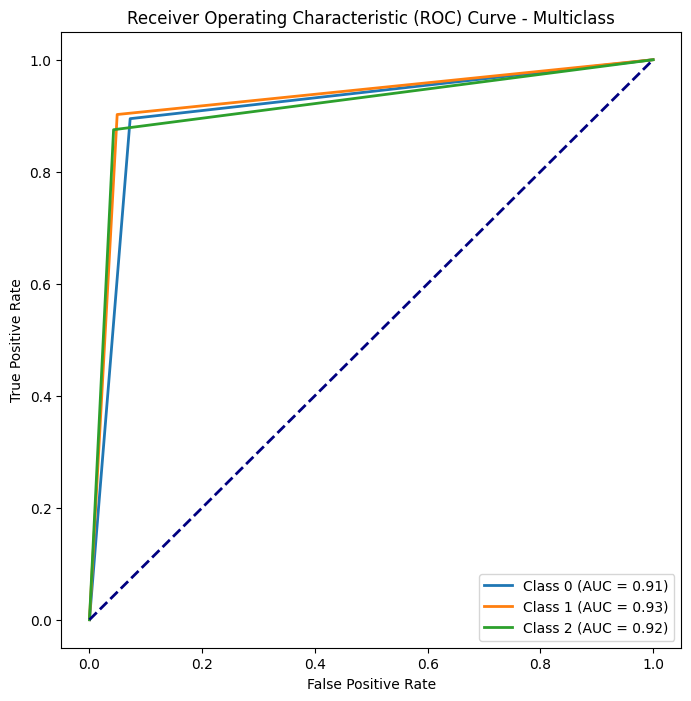

In [48]:
# Binarize the labels for each class
y_test_bin = label_binarize(y_test, classes=dt_model.classes_)

y_pred_prob = dt_model.predict_proba(X_test)

# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(dt_model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 8))
for i in range(len(dt_model.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multiclass')
plt.legend(loc='lower right')
plt.show()

# Neural Network

Epoch 1/10
22/22 [==============================] - 2s 25ms/step - loss: 1.2651 - accuracy: 0.5241 - val_loss: 0.8502 - val_accuracy: 0.6932
Epoch 2/10
22/22 [==============================] - 0s 4ms/step - loss: 0.5515 - accuracy: 0.8438 - val_loss: 0.5492 - val_accuracy: 0.8750
Epoch 3/10
22/22 [==============================] - 0s 4ms/step - loss: 0.4591 - accuracy: 0.8793 - val_loss: 0.4795 - val_accuracy: 0.8636
Epoch 4/10
22/22 [==============================] - 0s 3ms/step - loss: 0.4273 - accuracy: 0.8864 - val_loss: 0.5027 - val_accuracy: 0.8466
Epoch 5/10
22/22 [==============================] - 0s 4ms/step - loss: 0.4177 - accuracy: 0.8807 - val_loss: 0.5771 - val_accuracy: 0.8182
Epoch 6/10
22/22 [==============================] - 0s 4ms/step - loss: 0.4169 - accuracy: 0.8906 - val_loss: 0.4178 - val_accuracy: 0.8523
Epoch 7/10
22/22 [==============================] - 0s 3ms/step - loss: 0.3602 - accuracy: 0.8935 - val_loss: 0.4718 - val_accuracy: 0.8636
Epoch 8/10
22/22 [=

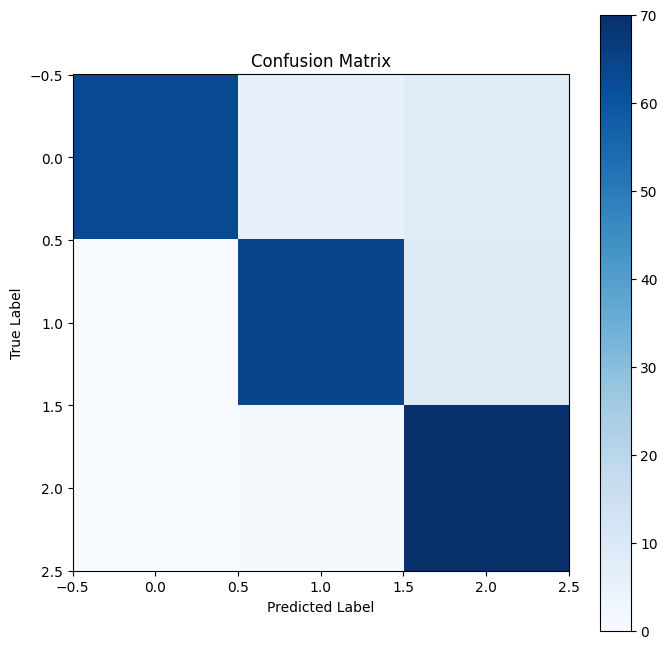

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        76
           1       0.91      0.88      0.90        73
           2       0.80      0.99      0.89        71

    accuracy                           0.90       220
   macro avg       0.91      0.90      0.90       220
weighted avg       0.91      0.90      0.90       220



In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_classes = len(set(y))

# Neural Network Architecture
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model
model.fit(X_train, tf.keras.utils.to_categorical(y_train, num_classes=num_classes), epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the Model
y_pred_prob = model.predict(X_test)

# Convert true labels to one-hot encoding
y_test_one_hot = label_binarize(y_test, classes=range(num_classes))

# Calculate accuracy
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Evaluate with classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

**NN ROC**

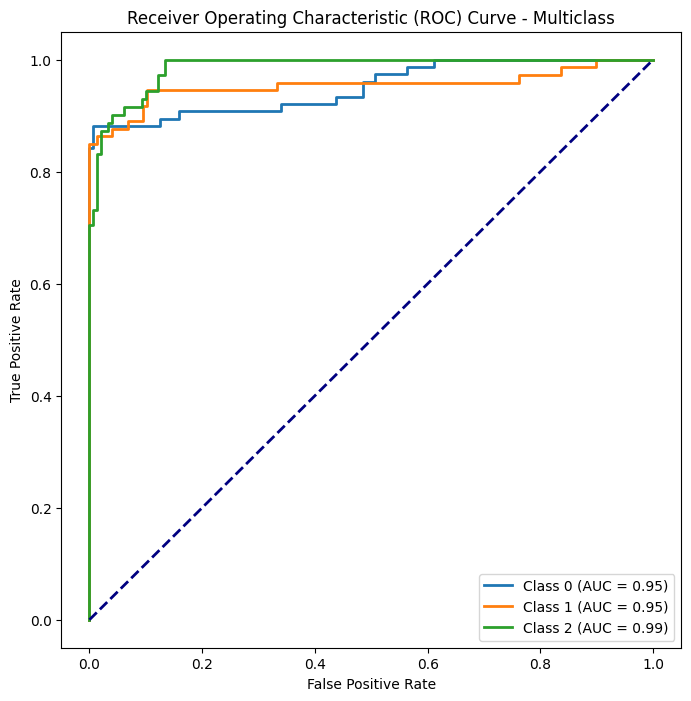

In [50]:
# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multiclass')
plt.legend(loc='lower right')
plt.show()